# Spectra acquisiton
Control both the stepping motor and the camera from this notebook.<br>
Make a loop to measure a wide-range spectrum automatically.

NOTE: only one connection to COM port is possible at a time. Shut down other connections, either in python or dedicated software.

In [1]:
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time, os, logging
from FLI import FLI
import numpy as np
import xarray as xr
from os.path import join
import datetime

In [3]:
%run thr640.py
%run imaging_tool.py

In [4]:
logger = logger
logger.setLevel(50) # 10 - DEBUG 50 - CRITICAL 20 - INFO
camera = FLI()
step_motor = THR640() # Can only have one instance.

In [5]:
basepath = r'\\10.249.254.51\Public\BACK_UP\takahashi\workspace\data\calibration\1219'
# basepath = r'C:\Users\fujii\Documents\python\kuzmin\hayashi\0121'
if not os.path.exists(basepath):
    os.makedirs(basepath)

In [6]:
ccw_limit = 0
cw_limit = 1030000

# LOOP

379000count
384000count
389000count
394000count
399000count
404000count
409000count
414000count
419000count


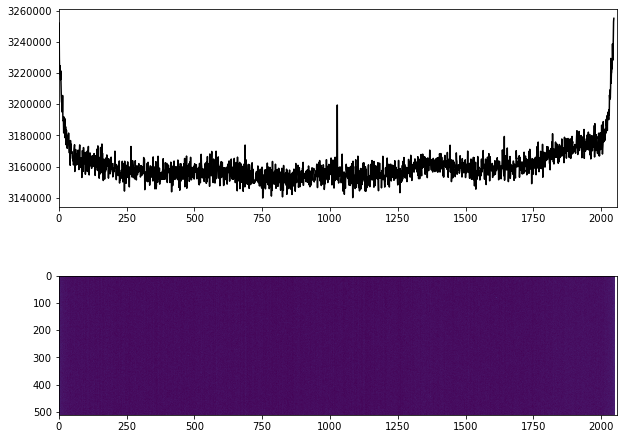

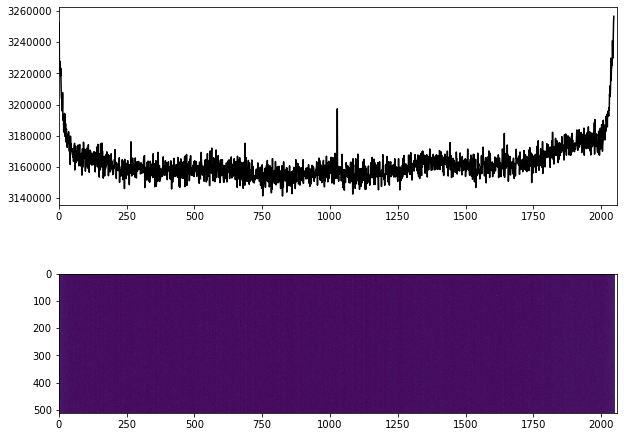

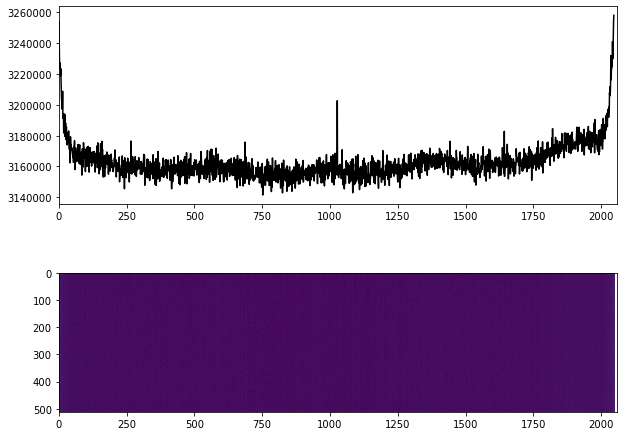

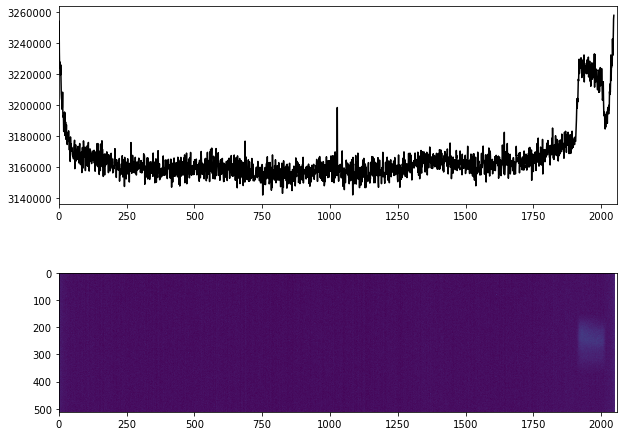

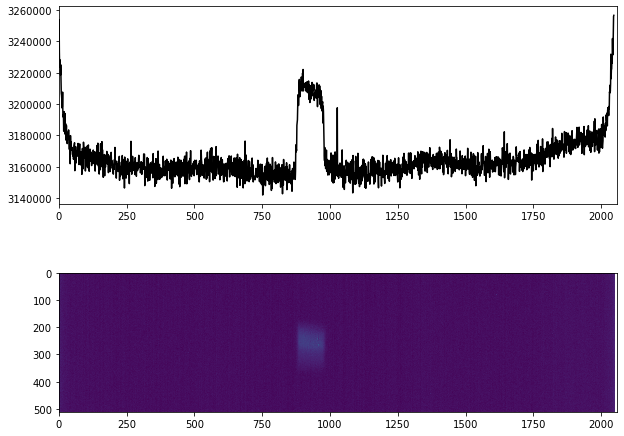

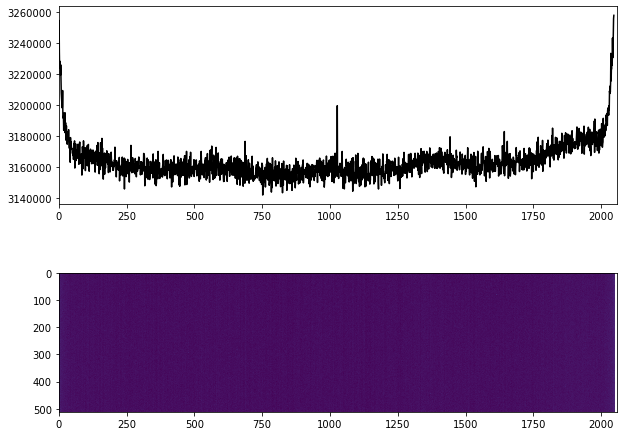

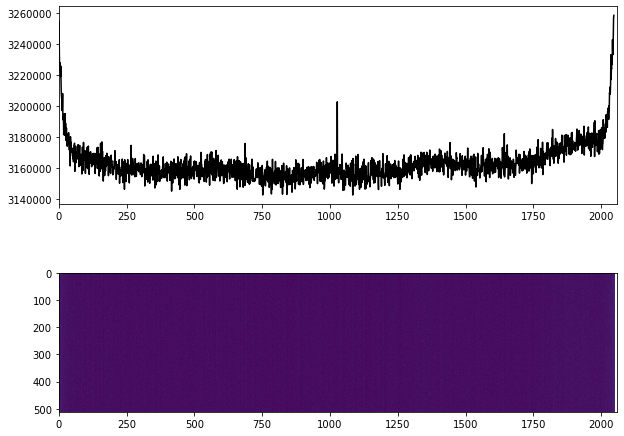

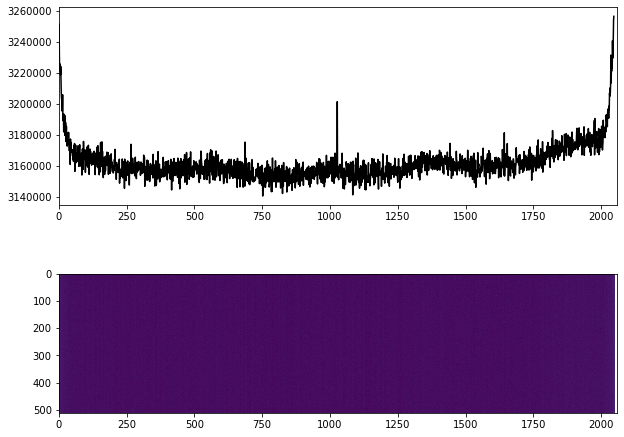

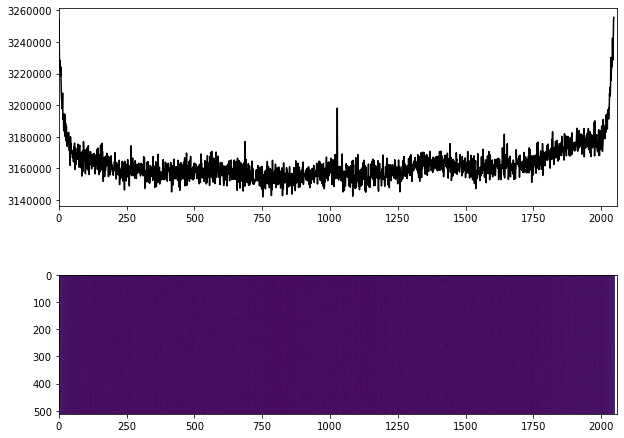

In [8]:
name=("calibration")
# name=("background")
# tag="cleaning"
exposure = 100 # ms
tag=""
ampere = 3
# R = range(200000,805000,5000)
# R = [211000,212000,215000,216000]
R = [399000+5000*i for i in range(-4, 5)]
# R = [635000+5000*i for i in range(5)]
# R = [180000,185000,195000]
# R = [500000+2000*i for i in range()]
# R = [(i+1)*5000 for i in range(200)]
# R = [420000]
# T = [60e3,10e3,60e3,60e3]
# T = [300e3]*len(R)
# T = [60e3]*6
# T = [10e3]*4 #H2onlyloop
# T = [100e3,50e3,50e3,50e3] #H2O2loop
# T = [10e3]*100
hour=datetime.datetime.now().hour;minute=datetime.datetime.now().minute

for i in range(len(R)):
    if ccw_limit < R[i] < cw_limit:
        print(f"{R[i]}count")
        step_motor.goto(R[i]);step_motor.waitUntilReady();vbin = 1
        attributes = {
            "temperature": camera.getTemperature(),
            "device_status": camera.getDeviceStatus(),
            "exposure": exposure,
            "frame_type": "light",
        }
        camera.setExposureTime(exposure);camera.setVBin(vbin);camera.setImageArea(10,0,2058,512//vbin);camera.exposeFrame()
        time.sleep(.1)
        
        image_data = camera.grabFrame(out=np.empty((512//vbin,2048), np.uint16)) # load image
        data = xr.DataArray(image_data, dims=["y", "x"], coords={"image_counter": 0}, attrs=attributes) # convert to xarray
        plot_image(image_data)
        # filepath = join(basepath,f'{name}-{R[i]}-{T[i]}ms-{ampere}A-{tag}-{hour}{minute}.nc')
        filepath = join(basepath,f'{name}-{R[i]}-{exposure}ms-{hour}{minute}-{tag}.nc')
        data.to_netcdf(filepath) # save data as NetCDF file
        
    else:
        print("out of range")
        break

In [8]:
import sys
print(sys.getrecursionlimit())

sys.exit()

3000


SystemExit: 

c:\Users\fujii\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3339: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
